In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace = True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df = pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [7]:
from sklearn.preprocessing import StandardScaler 

x = df.drop("Exited",axis=1)
y = df["Exited"]

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [9]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,596,32,3,96709.07,2,0,0,41788.37,True,False,True
4684,623,43,1,0.00,2,1,1,146379.30,False,False,True
1731,601,44,4,0.00,2,1,0,58561.31,False,True,False
4742,506,59,8,119152.10,2,1,1,170679.74,True,False,True
4521,560,27,7,124995.98,1,1,1,114669.79,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6412,602,53,5,98268.84,1,0,1,45038.29,True,False,False
8285,609,25,10,0.00,1,0,1,109895.16,False,False,True
7853,730,47,7,0.00,1,1,0,33373.26,False,False,False
1095,692,29,4,0.00,1,1,0,76755.99,False,False,True


In [10]:
scaling = StandardScaler()

x_train = scaling.fit_transform(x_train)
x_test = scaling.transform(x_test)

In [11]:
x_test


array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [12]:
from sklearn.linear_model import LogisticRegression 

In [13]:
lr = LogisticRegression()

lr.fit(x_train,y_train)



LogisticRegression()

In [14]:
y_predict = lr.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score 

score = accuracy_score (y_test,y_predict)

score 

0.811

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-07-05 09:35:58.853755: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751708159.083522      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751708159.150534      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=11))
for i in range (3):

    model.add(Dense(50,activation="relu"))


model.add(Dense(1,activation='sigmoid')) #binary classification problem that why Only 1 node at output layer




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-05 09:36:13.389301: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,821 (22.74 KB)

 Trainable params: 5,821 (22.74 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics = ["accuracy"])

In [20]:
history = model.fit(x_train,y_train,epochs=50,validation_split=0.2,batch_size=10)

Epoch 1/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7851 - loss: 0.4961 - val_accuracy: 0.8406 - val_loss: 0.3858
Epoch 2/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8338 - loss: 0.3868 - val_accuracy: 0.8600 - val_loss: 0.3598
Epoch 3/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8435 - loss: 0.3676 - val_accuracy: 0.8562 - val_loss: 0.3506
Epoch 4/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8592 - loss: 0.3508 - val_accuracy: 0.8575 - val_loss: 0.3499
Epoch 5/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8607 - loss: 0.3373 - val_accuracy: 0.8544 - val_loss: 0.3574
Epoch 6/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8636 - loss: 0.3436 - val_accuracy: 0.8569 - val_loss: 0.3449
Epoch 7/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8577 - loss: 0.3474 - val_accuracy: 0.8600 - val_loss: 0.3457
Epoch 8/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8546 - loss: 0.3503 - val_accuracy: 0.

In [21]:
y_pred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [22]:
y_pred

array([[0.03012551],
       [0.01614669],
       [0.09683751],
       ...,
       [0.5957136 ],
       [0.11982838],
       [0.22435965]], dtype=float32)

In [23]:
y_pred = np.where(y_pred>0.5,1,0)

In [24]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [25]:
from sklearn.metrics import accuracy_score 

score_neural = accuracy_score(y_test, y_pred)
score_neural

0.8575

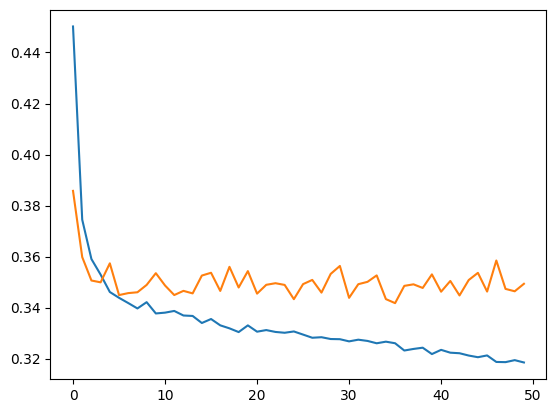

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

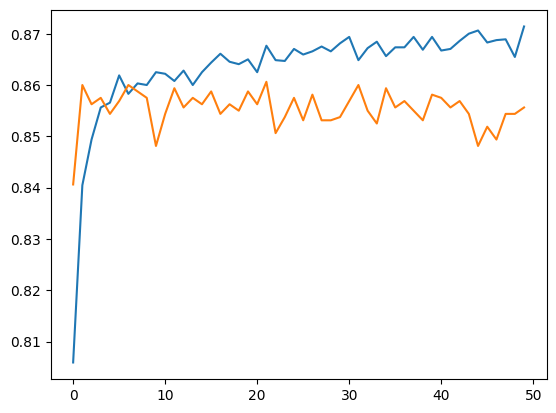

In [27]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])